### This is the actual production function(s)

`create_world.py` generates the full world. 

I'm a big fan of rouge-like games and RPGs. I'm also a big fan of data science tools for Python. This is my attempt to have it all. 

In [1]:
import pandas as pd
import numpy as np
import os
import django
import sys


sys.path.append("../..")
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "prodweb.settings")
django.setup()

sys.path.append("../")
import lib.create_world as c
import lib.drawMaps as draw
import lib.builders.culture as culture
import lib.builders.landscape as landscape
import lib.builders.towns as towns
import lib.builders.people as people
import lib.builders.nations as nations


pd.set_option("display.max_columns", 10)
pd.set_option("display.max_rows", 10)
%load_ext lab_black

## `timeit` functions to examin the runtime of each component. 

In [2]:
# %%timeit
# geo_world = c.the_first_age({})

In [3]:
geo_world = c.the_first_age({})

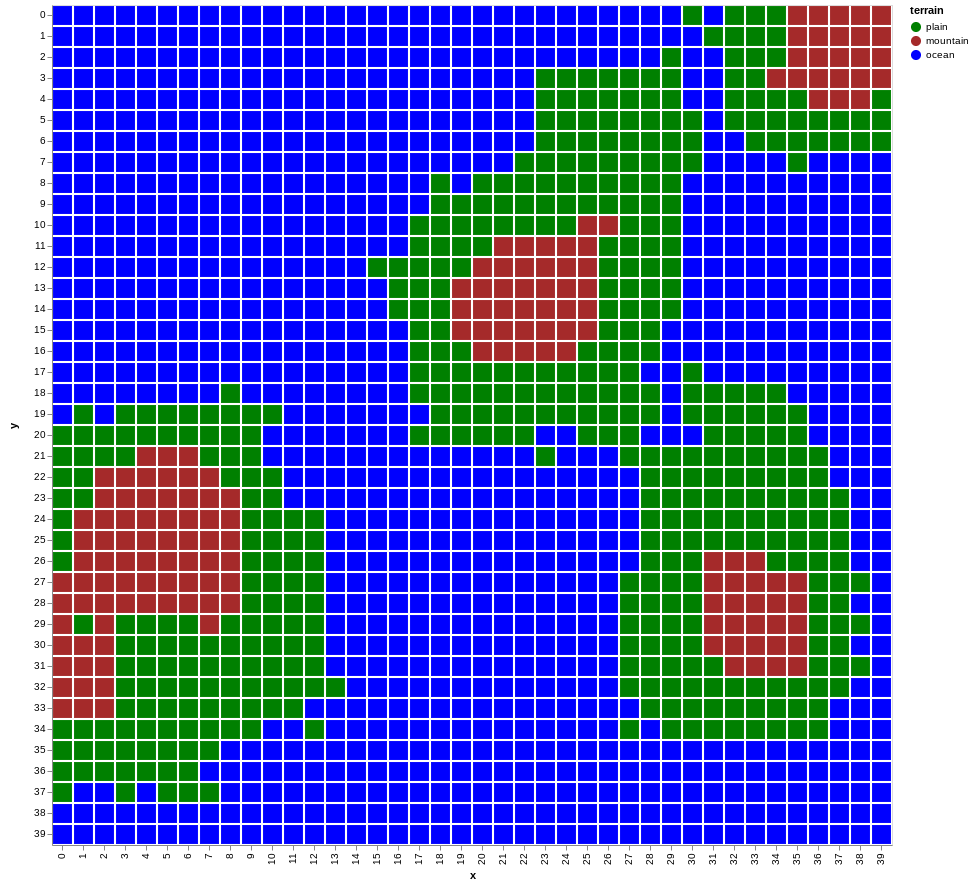

In [4]:
draw.drawTerrainTypes(geo_world.grid_elevation, geo_world.landscape)

# Second Age : Towns and Nations

In [5]:
geo_world.df_features

,y,rainfall,x,key,elevation,terrain
key,,,,,,
0:0,0,0.0,0,0:0,-1.0,ocean
1:0,0,3.0,1,1:0,0.0,ocean
2:0,0,4.0,2,2:0,-1.0,ocean
3:0,0,5.0,3,3:0,0.0,ocean
4:0,0,5.0,4,4:0,-2.0,ocean
...,...,...,...,...,...,...
35:39,39,0.0,35,35:39,-1.0,ocean
36:39,39,0.0,36,36:39,-2.0,ocean
37:39,39,0.0,37,37:39,0.0,ocean


In [6]:
world = c.the_second_age(geo_world, {})

7:34 desert
28:14 forest
17:17 plain
29:29 desert
29:29 town
25:10 mountain
29:29 town
30:7 forest
37:5 forest
36:23 plain
28:25 desert
28:14 town
25:10 town
30:7 town
25:4 forest
7:34 town
28:25 town
4:34 desert
26:4 forest
19:18 plain
5:37 desert
7:34 town
28:14 town
30:7 town
37:5 town
28:25 town
19:18 town
5:37 town
22:9 plain
33:6 forest
25:4 town
19:18 town
33:6 town
33:21 plain
37:4 mountain
5:32 desert
28:26 desert
29:29 town
30:7 town
37:5 town
28:25 town
5:37 town
23:21 plain
23:21 town
8:20 desert
17:17 town
29:29 town
37:5 town
5:37 town
22:9 town
5:32 town
18:19 plain
25:10 town
25:4 town
5:37 town
22:9 town
33:6 town
37:4 town
5:32 town
28:26 town
23:21 town
33:0 forest
23:15 mountain
9:23 desert
29:29 town
37:5 town
36:23 town
5:37 town
22:9 town
33:21 town
37:4 town
5:32 town
28:26 town
8:20 town


In [7]:
world.df_features.loc["4:33"].terrain

'desert'

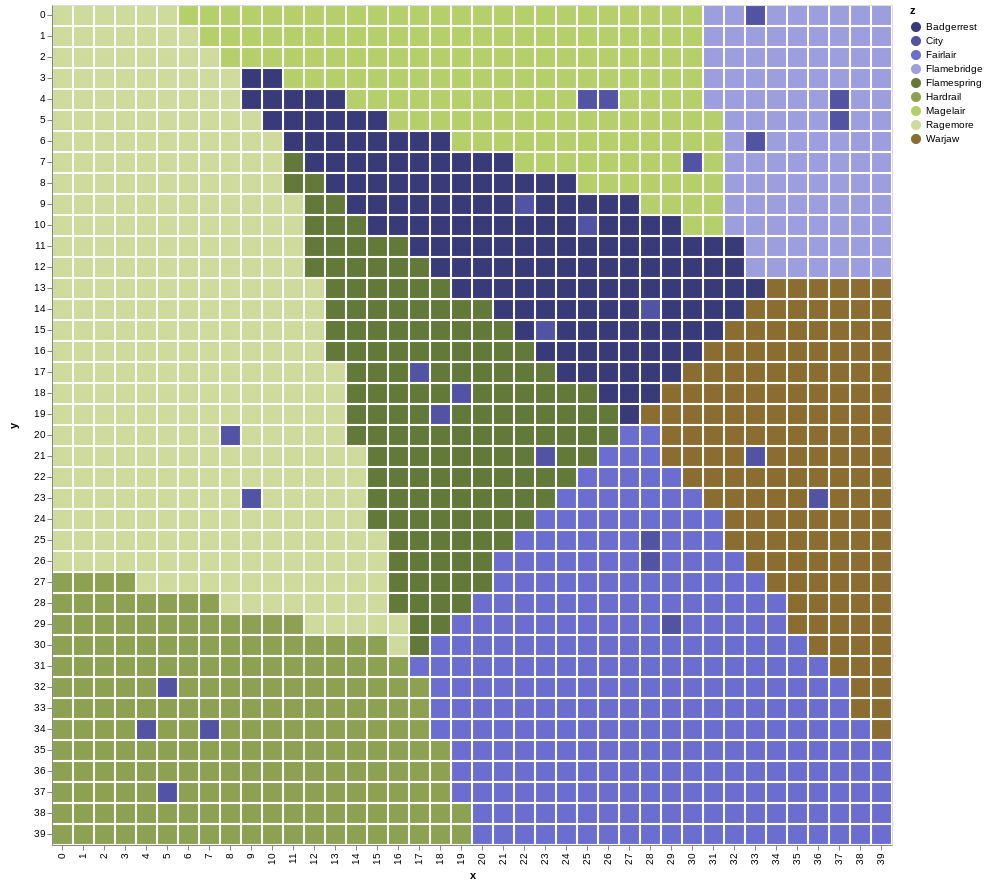

In [8]:
draw.drawboarders(world.df_features)

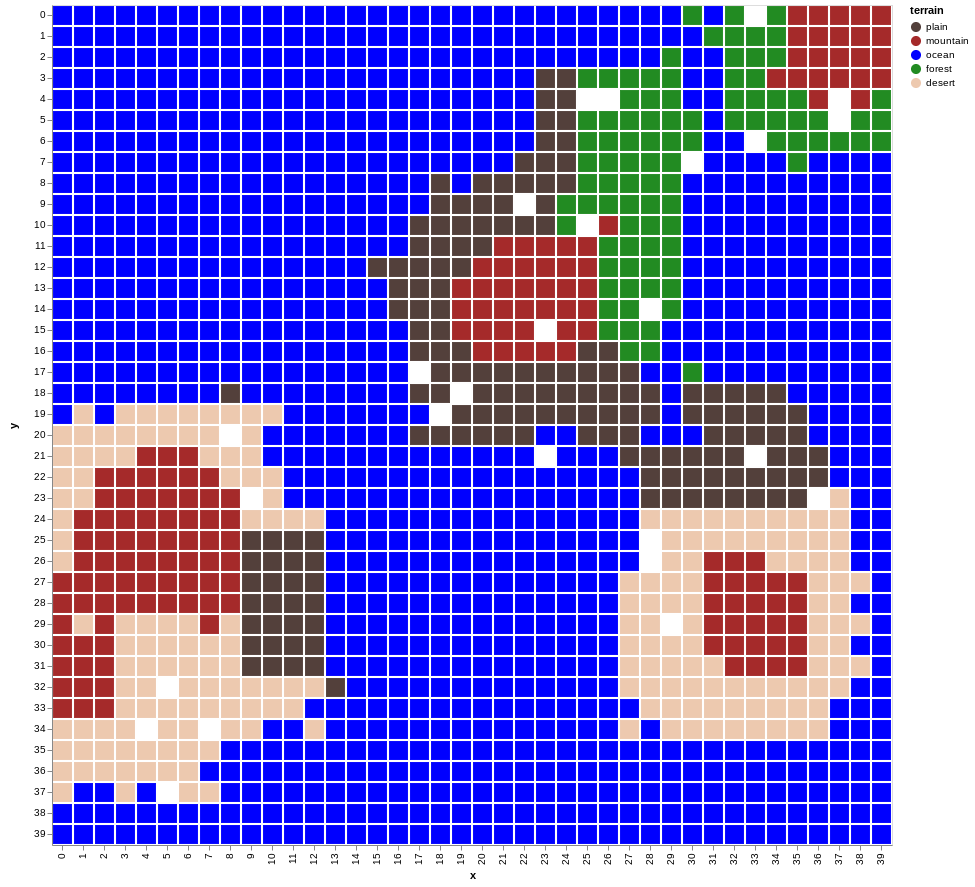

In [9]:
draw.drawterrainadvanced(world.df_features)

## The third age, conflict

In [1]:
world, events = c.the_third_age(world)
people

NameError: name 'c' is not defined

In [11]:
world

In [12]:
events

['0: bandits have set up camp in the None of [Nation of Flamespring]',
 '1: nothing happend during this period.',
 '2: nothing happend during this period.',
 '3: nothing happend during this period.',
 '4: raiders from [Nation of Warjaw], plundered [Nation of Fairlair, Nation of Ragemore, Nation of Magelair]',
 '5: nothing happend during this period.',
 '6: raiders from [Nation of Flamebridge], plundered [Nation of Hardrail, Nation of Magelair, Nation of Badgerrest]',
 '7: raiders from [Nation of Ragemore], plundered [Nation of Ragemore, Nation of Flamespring, Nation of Badgerrest]',
 '8: bandits have set up camp in the None of [Nation of Badgerrest]',
 '9: a great temple was founded in the city of Cammoral in [Nation of Ragemore]']

In [13]:
len(world.people)

74

In [14]:
world.people

[Tippsett the Speaker of Solfort,
 Dopprich the Speaker of Stenchkeep,
 Midsir the Speaker of Doomhail,
 Adapeltun the Speaker of Lordshost,
 Stickosh the commoner,
 Quonnob the Speaker of Brinecrawl,
 Urpprard the commoner,
 Masselle the Speaker of Hardmore,
 Eloscal the Speaker of Soilblade,
 Stukrik the Speaker of Ravenfort,
 Sexod the Speaker of Leaftear,
 Scotendunt the commoner,
 Melsek the commoner,
 Quosalkomir the commoner,
 Shaxid the Speaker of Magerise,
 Lawent the commoner,
 Redrit the commoner,
 Petendag the Speaker of Brinemain,
 Shondion the Speaker of Stonefort,
 Newallid the Speaker of Corecatch,
 Alivallid the Speaker of Fenfort,
 Illialdottle the commoner,
 Sayangic the commoner,
 Shassolen the commoner,
 Staladdab the commoner,
 Eleddim the commoner,
 Femattis the commoner,
 Trabbolen the commoner,
 Mommam the Speaker of Spinford,
 Hishur the Speaker of Heirhost,
 Mehallion the commoner,
 Ekollak the commoner,
 Ekopprach the commoner,
 Travnan the Speaker of Gleamb

In [15]:
world.df_features["feature"]

key
0:0      NaN
1:0      NaN
2:0      NaN
3:0      NaN
4:0      NaN
        ... 
35:39    NaN
36:39    NaN
37:39    NaN
38:39    NaN
39:39    NaN
Name: feature, Length: 1600, dtype: object

In [16]:
world.people

[Tippsett the Speaker of Solfort,
 Dopprich the Speaker of Stenchkeep,
 Midsir the Speaker of Doomhail,
 Adapeltun the Speaker of Lordshost,
 Stickosh the commoner,
 Quonnob the Speaker of Brinecrawl,
 Urpprard the commoner,
 Masselle the Speaker of Hardmore,
 Eloscal the Speaker of Soilblade,
 Stukrik the Speaker of Ravenfort,
 Sexod the Speaker of Leaftear,
 Scotendunt the commoner,
 Melsek the commoner,
 Quosalkomir the commoner,
 Shaxid the Speaker of Magerise,
 Lawent the commoner,
 Redrit the commoner,
 Petendag the Speaker of Brinemain,
 Shondion the Speaker of Stonefort,
 Newallid the Speaker of Corecatch,
 Alivallid the Speaker of Fenfort,
 Illialdottle the commoner,
 Sayangic the commoner,
 Shassolen the commoner,
 Staladdab the commoner,
 Eleddim the commoner,
 Femattis the commoner,
 Trabbolen the commoner,
 Mommam the Speaker of Spinford,
 Hishur the Speaker of Heirhost,
 Mehallion the commoner,
 Ekollak the commoner,
 Ekopprach the commoner,
 Travnan the Speaker of Gleamb